In [104]:
!pip install visualkeras
!pip install keras-visualizer

In [105]:
# @title ✅ Setup: import libraries and check GPU availability
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow:", tf.__version__)
print("GPU:", tf.config.list_physical_devices('GPU'))


TensorFlow: 2.19.0
GPU: []


#1 สร้าง data มาก่อน

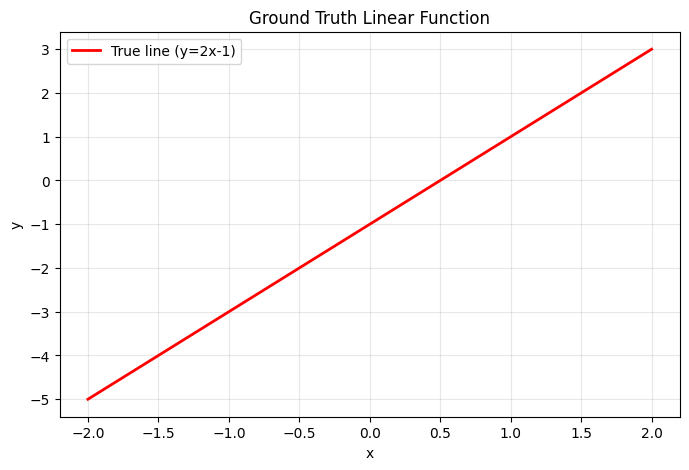

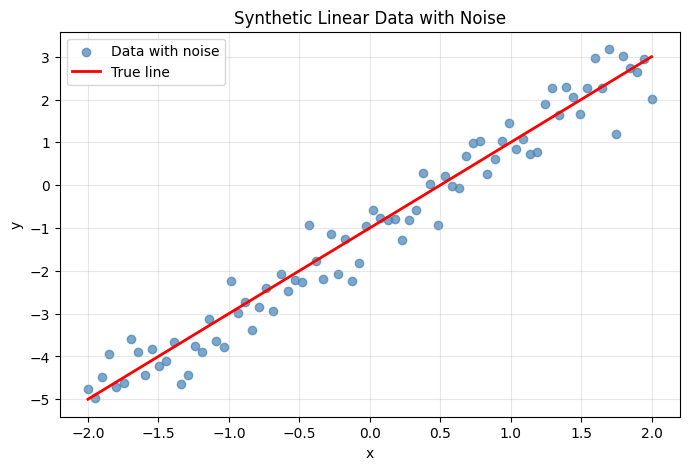

In [106]:
# ----- 1) Import libraries -----
import numpy as np
import matplotlib.pyplot as plt

# ----- 2) Make toy data: y = 2x - 1 + noise -----
n = 80
noise_max = 0.5
x = np.linspace(-2, 2, n).astype(np.float32)
y_true = 2.0 * x - 1.0  # ground truth line (no noise)
y = (y_true + np.random.normal(0, noise_max, size=n)).astype(np.float32)

# set input shape for tensorflow
x_tf = tf.constant(x.reshape(-1,1))
y_tf = tf.constant(y.reshape(-1,1))

# ----- 3) Plot ground truth line -----
plt.figure(figsize=(8,5))
plt.plot(x, y_true, color="red", linewidth=2, label="True line (y=2x-1)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ground Truth Linear Function")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ----- 4) Plot noisy data (scatter) -----
plt.figure(figsize=(8,5))
plt.scatter(x, y, color="steelblue", alpha=0.7, label="Data with noise")
plt.plot(x, y_true, color="red", linewidth=2, label="True line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Linear Data with Noise")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



# 2 Set model  W , b , leaning rate (lr) , epochs

Random init W: 0.32746851444244385  b: 0.0


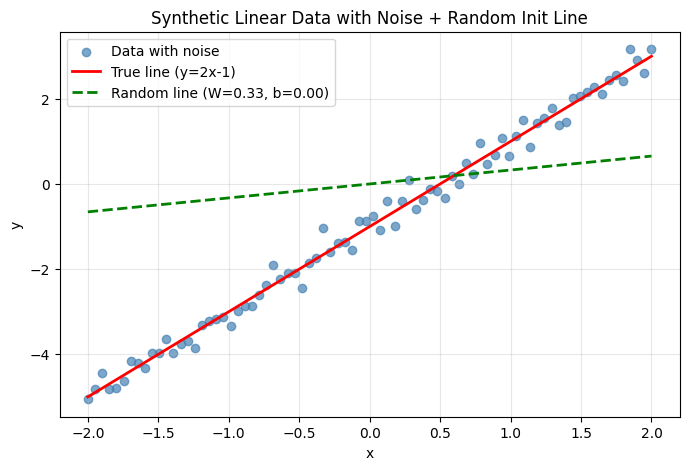

In [107]:
# ----- 1) Import libraries -----
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# ----- 2) Make toy data: y = 2x - 1 + noise -----
n = 80
x = np.linspace(-2, 2, n).astype(np.float32)
y_true = 2.0 * x - 1.0
y_noisy = (y_true + np.random.normal(0, 0.25, size=n)).astype(np.float32)

# ----- 3) Random initial parameters (W, b) -----
W = tf.Variable(tf.random.normal([1,1]))
b = tf.Variable(tf.zeros([1]))
print("Random init W:", W.numpy().item(), " b:", b.numpy().item())

# Predicted line with random W, b
y_random = W.numpy().item() * x + b.numpy().item()

# ----- 4) Plot data, true line, and random line -----
plt.figure(figsize=(8,5))

# noisy scatter
plt.scatter(x, y_noisy, color="steelblue", alpha=0.7, label="Data with noise")

# true line
plt.plot(x, y_true, color="red", linewidth=2, label="True line (y=2x-1)")

# random line
plt.plot(x, y_random, color="green", linestyle="--", linewidth=2, label=f"Random line (W={W.numpy().item():.2f}, b={b.numpy().item():.2f})")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Linear Data with Noise + Random Init Line")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



In [108]:
# ----- 2) Model (Sequential with 1 Dense layer) -----
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,),activation="linear")
])

In [109]:
#  summary
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

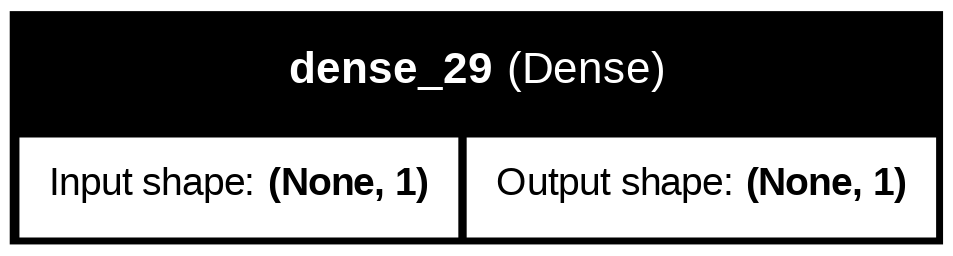

In [110]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

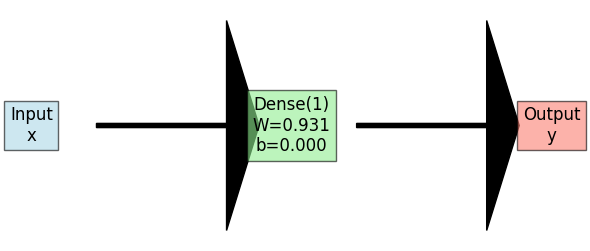

In [111]:
# ดึงค่า W และ b (ค่าที่ random init มา)
W, b = model.get_weights()

# ----- วาด diagram -----
fig, ax = plt.subplots(figsize=(6,3))

ax.text(0.1, 0.5, "Input\nx", ha="center", va="center", fontsize=12,
        bbox=dict(facecolor="lightblue", alpha=0.6))

ax.text(0.5, 0.5, f"Dense(1)\nW={W[0,0]:.3f}\nb={b[0]:.3f}",
        ha="center", va="center", fontsize=12,
        bbox=dict(facecolor="lightgreen", alpha=0.6))

ax.text(0.9, 0.5, "Output\ny", ha="center", va="center", fontsize=12,
        bbox=dict(facecolor="salmon", alpha=0.6))

# ลูกศร Input -> Dense
ax.arrow(0.2, 0.5, 0.2, 0, head_width=0.05, head_length=0.05, fc="k", ec="k")

# ลูกศร Dense -> Output
ax.arrow(0.6, 0.5, 0.2, 0, head_width=0.05, head_length=0.05, fc="k", ec="k")

ax.axis("off")
plt.show()

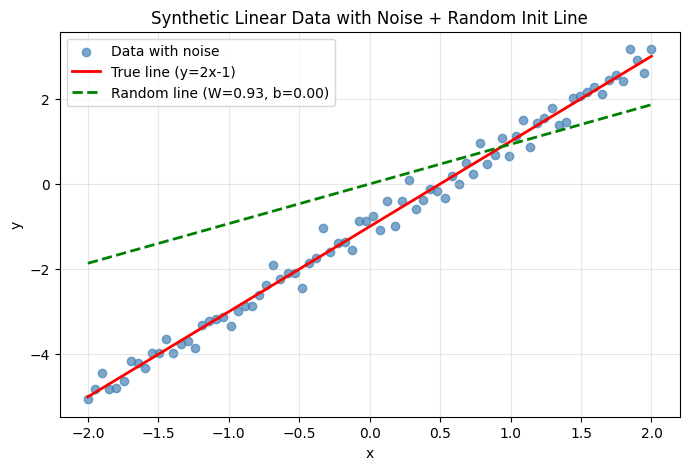

In [112]:
# ดึงค่า W และ b (random init)
W, b = model.get_weights()
W = W[0,0]   # ค่า scalar
b = b[0]     # ค่า scalar


# ----- คำนวณเส้นจาก random init -----
y_random = W * x + b

# ----- Plot -----
plt.figure(figsize=(8,5))

# noisy scatter
plt.scatter(x, y_noisy, color="steelblue", alpha=0.7, label="Data with noise")

# true line
plt.plot(x, y_true, color="red", linewidth=2, label="True line (y=2x-1)")

# random line
plt.plot(x, y_random, color="green", linestyle="--", linewidth=2,
         label=f"Random line (W={W:.2f}, b={b:.2f})")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Linear Data with Noise + Random Init Line")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

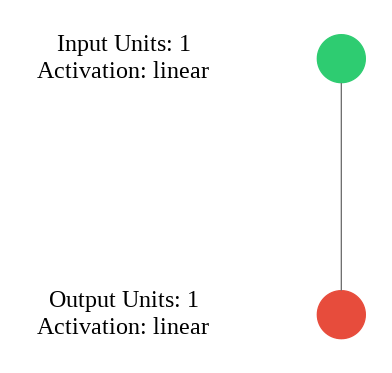

In [113]:
from keras_visualizer import visualizer
from IPython.display import Image

visualizer(model, file_name='graph', file_format=None, view=False, settings=None)

# # แสดงรูปใน notebook
Image(filename="graph.png")

# 3 Set optimizer

In [114]:
# ----- 3) Optimizer -----
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# 4 Set loss function

In [115]:
# ----- 4) Loss function -----
loss_fn = tf.keras.losses.MeanSquaredError()

# Animated GD with tf.keras.Sequential

In [116]:
# 🎬 Animated GD with tf.keras.Sequential
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

np.random.seed(42); tf.random.set_seed(42)

# ----- 1) Data -----
n = 80
x = np.linspace(-2, 2, n).astype(np.float32)
y = (2.0 * x - 1.0 + np.random.normal(0, 0.25, size=n)).astype(np.float32)

# reshape for Keras
x_tf = x.reshape(-1,1)
y_tf = y.reshape(-1,1)

# ----- 2) Model (Sequential with 1 Dense layer) -----
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,),activation="linear")
])

# ----- 3) Optimizer -----
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


# ----- 4) Loss function -----
loss_fn = tf.keras.losses.MeanSquaredError()


epochs = 60
loss_hist = []

# ----- Figure -----
xline = np.linspace(-2, 2, 200, dtype=np.float32).reshape(-1,1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))

# left: data + fit line
ax1.scatter(x, y, s=18, label="data")
(line_plot,) = ax1.plot(xline, model(xline).numpy(), lw=2, label="fit")
txt = ax1.text(0.02, 0.95, "", transform=ax1.transAxes, va="top")
ax1.set_title("Line fit updating (Sequential model)")
ax1.legend(); ax1.grid(True)

# right: loss
(loss_line,) = ax2.plot([], [])
ax2.set_xlim(0, epochs); ax2.set_ylim(0, 2.5)
ax2.set_title("MSE over epochs"); ax2.set_xlabel("epoch"); ax2.set_ylabel("MSE"); ax2.grid(True)

# ----- One training step -----
def train_step():
    with tf.GradientTape() as tape:
        y_pred = model(x_tf, training=True)
        loss = loss_fn(y_tf, y_pred)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return float(loss.numpy())

# ----- Animation -----
def update(frame):
    loss = train_step()
    loss_hist.append(loss)

    # update fit line
    yline = model(xline).numpy()
    line_plot.set_data(xline.ravel(), yline.ravel())

    # get current W, b
    W, b = model.layers[0].get_weights()
    txt.set_text(f"epoch: {frame+1}\nW: {W[0,0]:.3f}\nb: {b[0]:.3f}\nMSE: {loss:.4f}")

    # update loss curve
    loss_line.set_data(np.arange(1, len(loss_hist)+1), loss_hist)
    ax2.set_ylim(0, max(2.5, max(loss_hist)*1.1))
    return line_plot, loss_line, txt

anim = FuncAnimation(fig, update, frames=epochs, interval=120, blit=False)
display(HTML(anim.to_jshtml()))
plt.close(fig)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Tool

In [116]:
# ============================================================
# Colab Animation: "Top-to-Bottom" Fitting (no Gradient Descent)
# - Sweep b (intercept) from high -> low
# - For each b, compute closed-form W*(b) and draw y = W*x + b
# - Animate MSE curve: line reveals progressively + moving point
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

# -----------------------
# 1) Data (replace with yours)
# -----------------------
rng = np.random.default_rng(123)
n = 80
true_W, true_b = 2.0, -1.0
x = np.linspace(-2.5, 3.0, n)
y = true_W * x + true_b + rng.normal(0, 0.7, size=n)

# -----------------------
# 2) Sweep range for b (top -> bottom)
# -----------------------
ymax, ymin = y.max(), y.min()
margin = 3.0
b_top = ymax + margin
b_bottom = ymin - margin

n_frames = 160
b_values = np.linspace(b_top, b_bottom, n_frames)

# -----------------------
# 3) Precompute constants
# -----------------------
Sx  = np.sum(x)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

def best_W_given_b(b):
    # W*(b) = (Σ x_i y_i - b Σ x_i) / Σ x_i^2
    return (Sxy - b * Sx) / Sxx

def mse_of(W, b):
    return np.mean((W*x + b - y)**2)

# Loss(b) for all frames (used for animation)
loss_curve = np.array([mse_of(best_W_given_b(b), b) for b in b_values])

# -----------------------
# 4) Figure 1: fitting line (scatter + moving line)
# -----------------------
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.set_title("Top-to-Bottom Fitting (sweeping b from high to low)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.scatter(x, y, alpha=0.85)

xpad = 0.1 * (x.max() - x.min() + 1e-9)
ypad = 0.2 * (y.max() - y.min() + 1e-9)
ax1.set_xlim(x.min() - xpad, x.max() + xpad)
ax1.set_ylim(y.min() - ypad, y.max() + ypad)

xx = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 300)
(line_fit,) = ax1.plot([], [], linewidth=2)
txt1 = ax1.text(0.02, 0.95, "", transform=ax1.transAxes, va="top")

def init1():
    line_fit.set_data([], [])
    txt1.set_text("")
    return line_fit, txt1

def update1(i):
    b = b_values[i]
    W = best_W_given_b(b)
    yy = W * xx + b
    line_fit.set_data(xx, yy)
    txt1.set_text(
        f"frame {i+1}/{n_frames}\n"
        f"W*(b) = {W:.3f}\n"
        f"b = {b:.3f}\n"
        f"MSE = {mse_of(W,b):.4f}"
    )
    return line_fit, txt1

anim1 = FuncAnimation(fig1, update1, frames=n_frames, init_func=init1, blit=True, interval=50)

# -----------------------
# 5) Figure 2: MSE vs b (progressive line + moving point)
#    *** เปลี่ยนสำคัญ: ไม่วาดเส้นทั้งเส้นตั้งแต่แรกแล้ว ***
# -----------------------
fig2, ax2 = plt.subplots(figsize=(7, 5))
ax2.set_title("MSE vs b (progressively revealed)")
ax2.set_xlabel("b (intercept)")
ax2.set_ylabel("MSE")

# เริ่มต้นด้วยเส้นว่าง ๆ และจุดว่าง ๆ
(line_loss,) = ax2.plot([], [], linewidth=2, marker=None)   # progressive line
(point_loss,) = ax2.plot([], [], marker="o", markersize=6)  # moving point
txt2 = ax2.text(0.02, 0.95, "", transform=ax2.transAxes, va="top")

# กำหนดขอบแกนล่วงหน้า เพื่อไม่ให้ autoscale เด้งไปมา
ax2.set_xlim(b_values.min(), b_values.max())
ax2.set_ylim(0, loss_curve.max() * 1.05)

def init2():
    line_loss.set_data([], [])
    point_loss.set_data([], [])
    txt2.set_text("")
    return line_loss, point_loss, txt2

def update2(i):
    # ค่อย ๆ เผยเส้น: ใช้ข้อมูลถึงเฟรม i
    xs = b_values[:i+1]
    ys = loss_curve[:i+1]
    line_loss.set_data(xs, ys)

    # จุดเคลื่อนตามเฟรม
    b = b_values[i]
    L = loss_curve[i]
    point_loss.set_data([b], [L])

    # ข้อความกำกับ
    txt2.set_text(f"frame {i+1}/{n_frames}\nb = {b:.3f}\nMSE = {L:.4f}")
    return line_loss, point_loss, txt2

anim2 = FuncAnimation(fig2, update2, frames=n_frames, init_func=init2, blit=True, interval=50)

# -----------------------
# 6) แสดงทั้งสองแอนิเมชัน inline ใน Colab
# -----------------------
display(HTML(anim1.to_jshtml()))
display(HTML(anim2.to_jshtml()))
